## FAKE NEWS DETECTION

In [1]:
import pandas as pd

C:\Users\aless\AppData\Local\Temp\ipykernel_17024\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
true = pd.read_csv("True.csv")
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
fake = pd.read_csv("Fake.csv")
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


### TOPIC MODELLING: LDA

In [4]:
dataset = fake['title'] + fake['text']+fake['subject']

In [5]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

C:\Users\aless\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aless\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def sent_to_words(items):
    for item in items:
        yield(gensim.utils.simple_preprocess(str(item), deacc=True))

def remove_stopwords(texts):
    return [[word for word in words if word not in stop_words and len(word) >=5] for words in texts]

data_words = list(sent_to_words(dataset))
data_words = remove_stopwords(data_words)

In [7]:
import gensim.corpora as corpora 

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_words]

In [8]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       passes = 3)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.046*"trump" + 0.011*"president" + 0.008*"donald" + 0.007*"people" + '
  '0.005*"house" + 0.005*"would" + 0.004*"video" + 0.004*"white" + '
  '0.004*"obama" + 0.004*"media"'),
 (1,
  '0.005*"people" + 0.005*"police" + 0.004*"shooting" + 0.004*"state" + '
  '0.004*"would" + 0.004*"media" + 0.003*"attack" + 0.003*"video" + '
  '0.003*"trump" + 0.003*"story"'),
 (2,
  '0.010*"obama" + 0.007*"president" + 0.005*"would" + 0.005*"trump" + '
  '0.005*"clinton" + 0.004*"white" + 0.004*"black" + 0.004*"people" + '
  '0.004*"media" + 0.003*"america"'),
 (3,
  '0.008*"clinton" + 0.008*"trump" + 0.006*"would" + 0.005*"state" + '
  '0.005*"people" + 0.004*"hillary" + 0.004*"president" + 0.004*"video" + '
  '0.004*"campaign" + 0.003*"obama"'),
 (4,
  '0.013*"trump" + 0.009*"obama" + 0.007*"president" + 0.006*"clinton" + '
  '0.006*"people" + 0.005*"state" + 0.005*"republican" + 0.005*"states" + '
  '0.004*"would" + 0.004*"hillary"'),
 (5,
  '0.009*"trump" + 0.006*"court" + 0.006*"clinton" +

With the LDA, it has emerged that politics, in particular Trump and everything around the White House are the topics most prone to fake news. 

### Model

In [9]:
# creating a target column named 'label' in both true and fake news data and concatenatind them
true['label'] = 1
fake['label'] = 0
df = pd.concat([true, fake])
label=df['label']


In [10]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


<Axes: xlabel='label', ylabel='Count'>

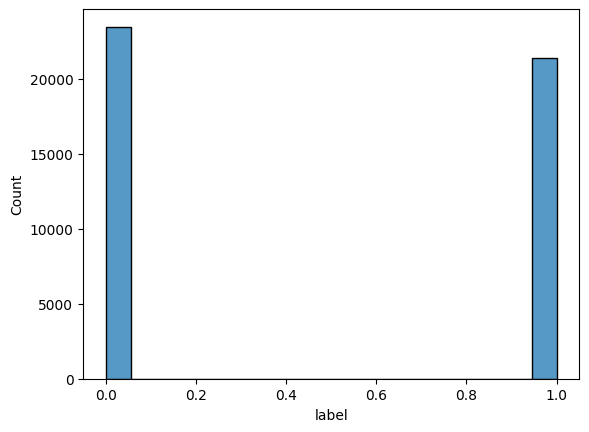

In [11]:
# check whether our data is balanced
import seaborn as sns
sns.histplot(df['label'])

In [12]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

We have no null values

<Axes: xlabel='count', ylabel='subject'>

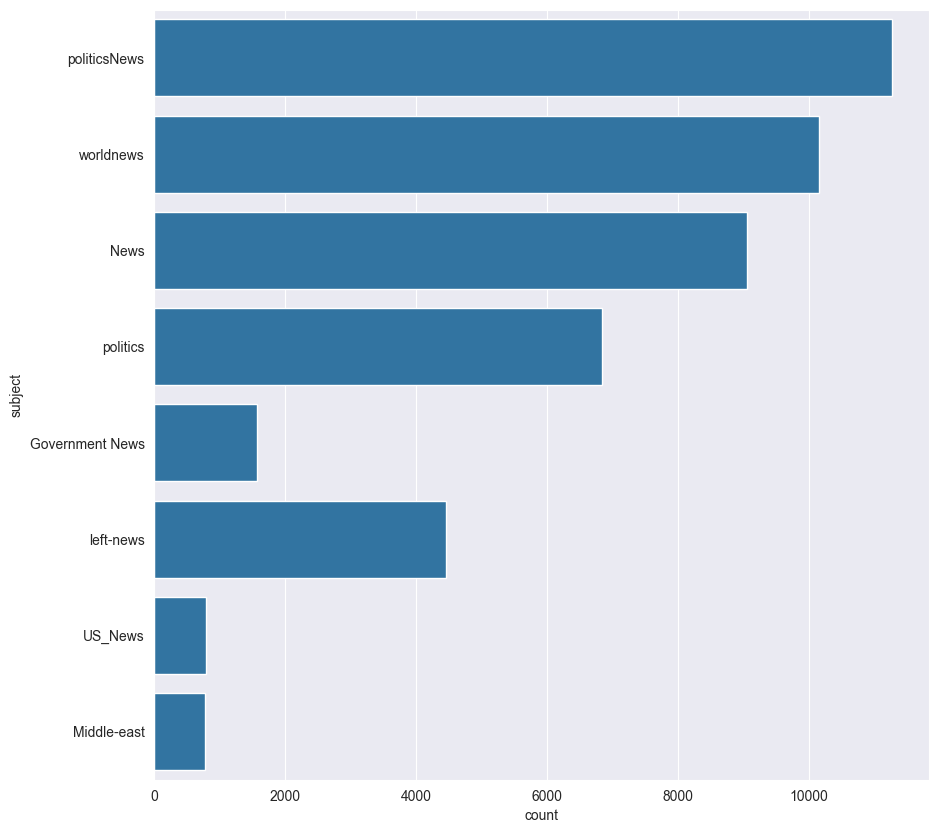

In [15]:
# Examine the subjects
import matplotlib.pyplot as plt
df['subject'].value_counts()
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(df['subject'])

There are about 8 subjects. There are the largest number of news from politicsNews and wordnews.

C:\Users\aless\AppData\Local\Temp\ipykernel_17024\2606170854.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


[Text(0, 0, '0'), Text(1, 0, '1')]

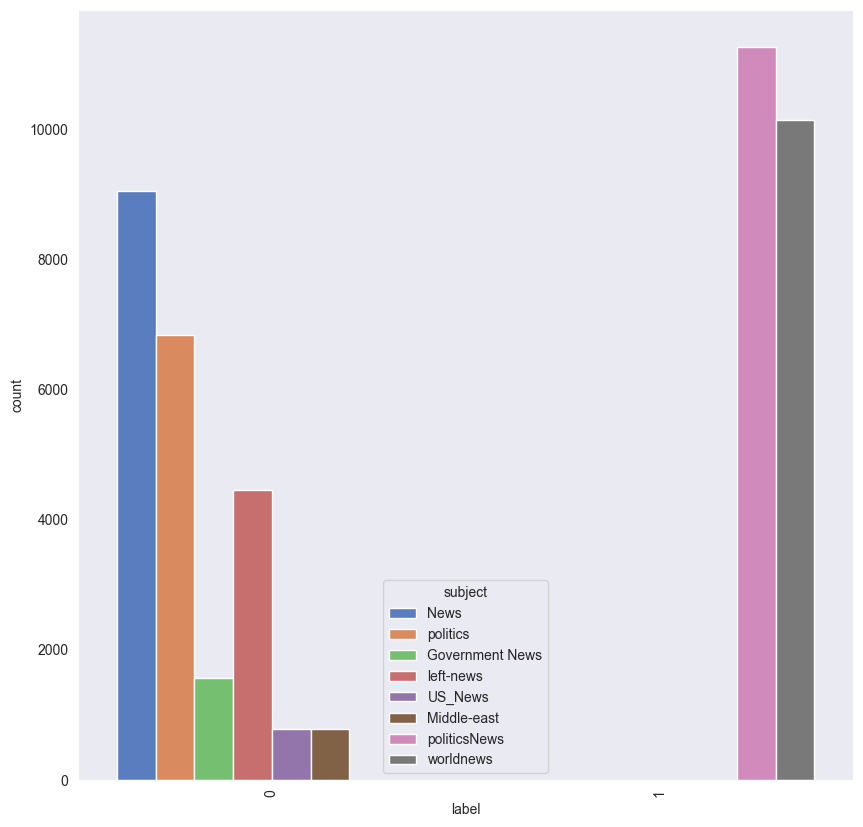

In [16]:
# check it 
plt.figure(figsize =(10,10))
sns.set_style("dark")
chart = sns.countplot(x = 'label', hue = 'subject', data = df, palette = 'muted')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

The plot shows that all true news belongs to 2 subjects. 

In [17]:
# concantenate title and text fileds into one column and drop all other columns
df['text'] = df['title'] + " " + df['text']
data = df.drop(['title', 'subject', 'date'], axis=1)

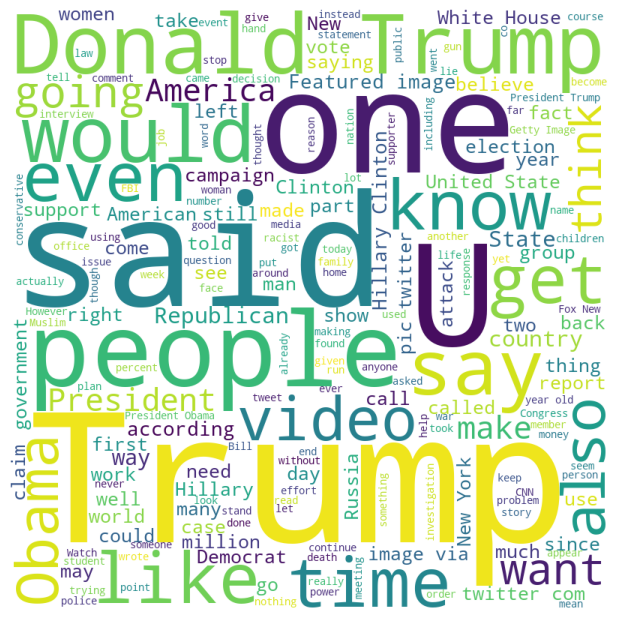

In [49]:
# WORD CLOUD to analyse the most frequency words in our fake data 
from nltk.corpus import stopwords
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords = stopwords.words('english'),
                     min_font_size=10).generate(" ".join(data[data['label']==0].text))

# plot the word cloud for fake news data
plt.figure(figsize = (10,6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad =0)
plt.show()

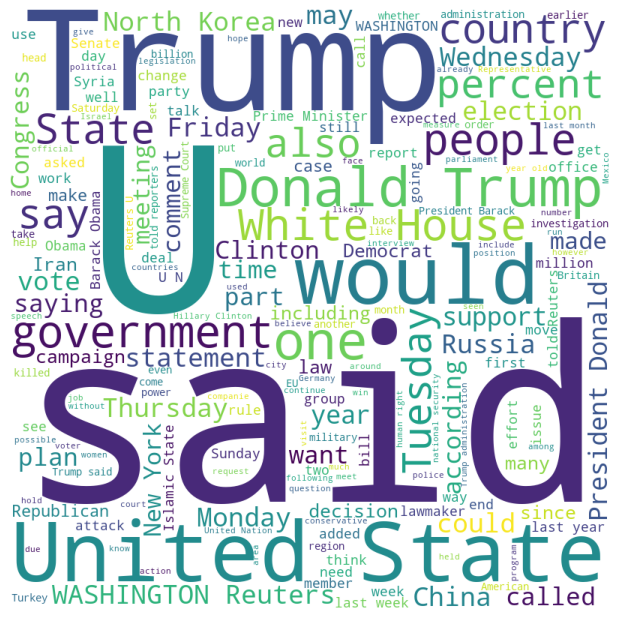

In [47]:
# WORD CLOUD to analyse the most frequency words in our fake data 
wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords = stopwords.words('english'),
                     min_font_size=10).generate(" ".join(data[data['label']== 1].text))

# plot the word cloud for true news data
plt.figure(figsize = (10,6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad =0)
plt.show()

From the word clouds there are a lot of true and fake news about Donald Trump and United States, confirming what was found with lda. 

### Classification

In [20]:
# splitting data for training and testing
import sklearn 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size = 0.2, random_state=1)

In [21]:
# Convert text to vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

#### Multinomial Naive Bayes

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import sklearn.metrics as metrics                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [31]:
# Create and train the multinomial model
multinomial_model = MultinomialNB()
multinomial_model.fit(xv_train, y_train)

# Evaluate the model
y_pred_m = multinomial_model.predict(xv_test)
accuracy = accuracy_score(y_test, y_pred_m)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_m))


Accuracy: 0.9390868596881959
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4678
           1       0.95      0.93      0.94      4302

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



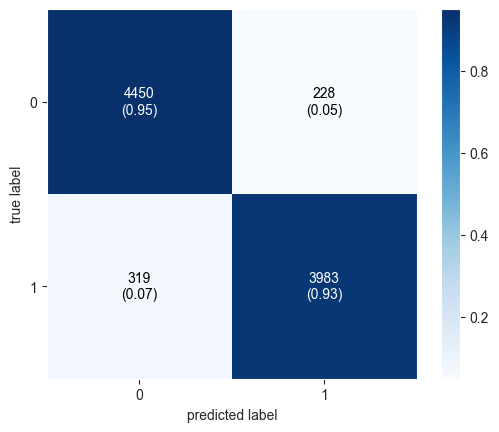

In [26]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_m)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix,
                               show_absolute=True,
                               show_normed=True,
                               colorbar=True)
plt.show()

#### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [34]:
# Creation and training of the logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(xv_train, y_train)

LogisticRegression()

In [35]:
# Evaluate the model
y_pred_lr = logistic_regression_model.predict(xv_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.9888641425389755
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4678
           1       0.99      0.99      0.99      4302

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



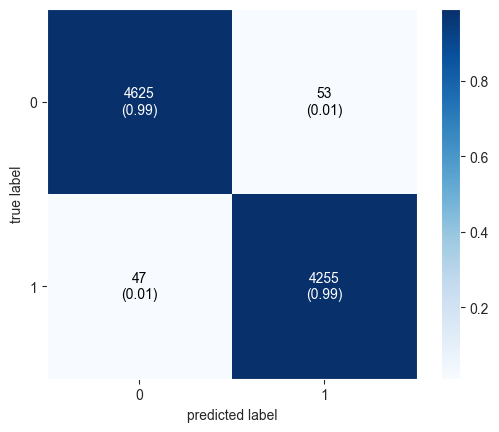

In [36]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix,
                               show_absolute=True,
                               show_normed=True,
                               colorbar=True)
plt.show()

#### Decision Tree Classification

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [43]:
y_pred_dt = DT.predict(xv_test)
DT.score(xv_test, y_test)
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.9955456570155902
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4678
           1       1.00      1.00      1.00      4302

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



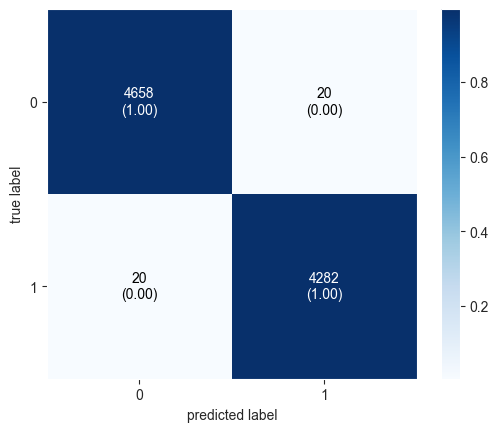

In [44]:
# Calcola la matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred_dt)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix,
                               show_absolute=True,
                               show_normed=True,
                               colorbar=True)
plt.show()

I have classified news data using three classification models. I have analysed the performance of the models using accuracy and confusion matrix. The 'worst' model is the MutinomialNB, with an accuracy of 0.93, in fact misclassifying more than 500 news items. The logistic regression has a higher accuracy, 0.98, and misclassifies about 90 news items. The best model is the Decision Tree, with an accuracy over 0.99, and classifying only 40 observations incorrectly.

### Title

In [45]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...","As U.S. budget fight looms, Republicans flip t...",politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,U.S. military to accept transgender recruits o...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,FBI Russia probe helped by Australian diplomat...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,Trump wants Postal Service to charge 'much mor...,politicsNews,"December 29, 2017",1


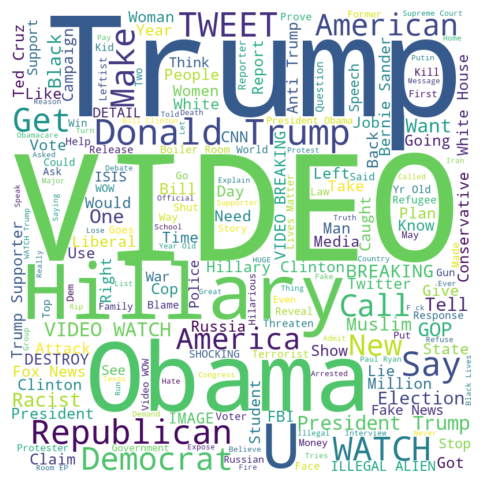

In [46]:
# WORD CLOUD to analyse the most frequency words in our fake data title
wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords = stopwords.words('english'),
                     min_font_size=10).generate(" ".join(df[df['label']==0].title))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

It seems that the title with 'Video', 'Trump', 'Hillary', 'Obama', are the ones most prone to fake news.

In [ ]:
!wget https://proai-datasets.s3.eu-west-3.amazonaws.com/fake_news.zip
!unzip fake_news.zip